<a href="https://colab.research.google.com/github/ashrafulwork/Learning_MLDL/blob/Project_ML_DL_/project_loan_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet Information:

Loan_ID :Provides the id number given to the candidature .
Gender :The gender of a candidature.
Married :The candidature marital Status.
Dependants : The number of people dependent on the candidate.
Education :The education of a candidate.
Self_employed :The employment type of a candidate.
ApplicantIncome :Total income of a candidate.
CoapplicantIncome:Total income of a coapplicant of a candidate.
LoanAmount :Total amount of a loan.
Loan_Amount_Term :The total time duration of a loan.
Credit_History :The credit score of a candidate.
Property_Area : From which region the candidate belongs.
Loan_Status :Whether the loan is approved or not.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ninzaami/loan-predication")

print("Path to dataset files:", path)

100%|██████████| 7.83k/7.83k [00:00<00:00, 3.19MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1


In [2]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import numpy as np
import seaborn as sns
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

     \ 17.8 MB 21.0 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356222 sha256=cc9bf42f3b1ca36f0f003a3268947270cba1391dfe152e4d4ff9a18df12cae02
  Stored in directory: /tmp/pip-ephem-wheel-cache-unpmy0x7/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f9ba0b26e8ec6c094e71ab9f1910ca58a3359fadf468d6def997d48f6db64b3e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

<ipython-input-2-cdf89260631c>:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
import os
os.listdir('/root/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1')

['train_u6lujuX_CVtuZ9i (1).csv']

In [4]:
loan_dataset = pd.read_csv('/root/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1/train_u6lujuX_CVtuZ9i (1).csv')


In [5]:
profile = ProfileReport(loan_dataset, title="Loan Dataset")

In [6]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
loan_dataset['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


Loan_Status
Y    422
N    192
Name: count, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

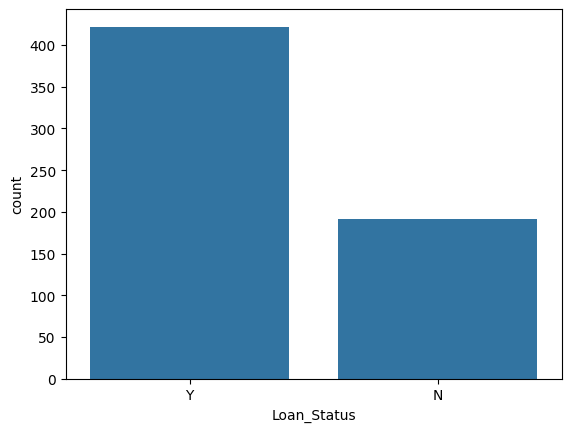

In [9]:
import seaborn as sns

# Check the class distribution
print(loan_dataset['Loan_Status'].value_counts())

# Plot the class distribution
sns.countplot(x='Loan_Status', data=loan_dataset)

In [10]:
# from imblearn.over_sampling import SMOTE

# # Separate input features (X) and target variable (y)
# X = loan_dataset.drop('Loan_Status', axis=1)
# y = loan_dataset['Loan_Status']

# # Convert categorical columns to numeric using dummy encoding (if necessary)
# X = pd.get_dummies(X)

# # Apply SMOTE to the dataset
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

# # Check the new class distribution
# print(y_res.value_counts())

In [11]:
loan_dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
609,False
610,False
611,False
612,False


In [12]:
print(loan_dataset.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [13]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [14]:
loan_dataset.isnull().any()

,0
Loan_ID,False
Gender,True
Married,True
Dependents,True
Education,False
Self_Employed,True
ApplicantIncome,False
CoapplicantIncome,False
LoanAmount,True
Loan_Amount_Term,True


In [15]:
# loan_dataset=loan_dataset.drop_duplicates()
#no duplicates found

In [16]:
(loan_dataset == '?').sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [17]:
loan_dataset = loan_dataset.dropna()

In [18]:
# def plot_boxplot(df, ft):
#     df.boxplot(column =[ft])
#     plt.grid(False)
#     plt.show()


In [19]:
# plot_boxplot(loan_dataset,'ApplicantIncome')

In [20]:
# def outliers(df, ft):
#     Q1 = df[ft].quantile(0.25)
#     Q3 = df[ft].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Print the lower and upper bounds
#     print(f"Lower Bound: {lower_bound}")
#     print(f"Upper Bound: {upper_bound}")

#     ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
#     return ls




In [21]:
# index_list = []
# for feature in ['ApplicantIncome', 'CoapplicantIncome']:
#     index_list.extend(outliers(loan_dataset, feature))

In [22]:
# index_list

In [23]:
# def remove(df,ls):
#     ls = sorted(set(ls))
#     df = df.drop(ls)
#     return df

In [24]:
# df_cleaned  = remove(loan_dataset, index_list)

In [25]:
# plot_boxplot(df_cleaned,'ApplicantIncome')


In [26]:
print(loan_dataset.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [27]:
# sns.boxplot(x='Loan_Status',data=loan_dataset,y='ApplicantIncome',hue='Loan_Status')

In [28]:
# sns.boxplot(y=loan_dataset['ApplicantIncome'], orient='v')

In [29]:
# len(loan_dataset['ApplicantIncome'])

In [30]:
# q1 = loan_dataset['ApplicantIncome'].quantile(0.25)
# q3 = loan_dataset['ApplicantIncome'].quantile(0.75)
# iqr = q3-q1

In [31]:
# q1,q3,iqr

In [32]:
# up  = q3 + (1.5 *iqr)
# lp = q1 - (1.5 *iqr)
# lp, up

In [33]:
# new_df = loan_dataset.loc[(loan_dataset['ApplicantIncome'] < up) & (loan_dataset['ApplicantIncome'] > lp)]
# print("before removing outliers : ", len(loan_dataset))
# print("after removing outliers : ", len(new_df))
# print("outlier numbers : ", len(loan_dataset)-len(new_df))

In [34]:
# sns.boxplot(x=new_df['ApplicantIncome'], orient='h')

In [35]:
# new_df = loan_dataset.copy()
# new_df.loc[(new_df['ApplicantIncome'] > up), 'ApplicantIncome'] = up
# new_df.loc[(new_df['ApplicantIncome'] < lp), 'ApplicantIncome'] = lp

In [36]:
# sns.boxplot(x=new_df['ApplicantIncome'], orient='h')

In [37]:
# print(len(new_df))

In [38]:
# loan_dataset = new_df

In [39]:
# sns.boxplot(x='Loan_Status',data=loan_dataset,y='ApplicantIncome',hue='Loan_Status')

In [40]:
# sns.boxplot(x='Loan_Status',data=loan_dataset,y='CoapplicantIncome',hue='Loan_Status')

In [41]:
print(loan_dataset.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [42]:
# sns.boxplot(y=loan_dataset['CoapplicantIncome'], orient='v')

In [43]:
# len(loan_dataset['CoapplicantIncome'])

In [44]:
# # List of features to apply the outlier removal process
# features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']  # Add other features as needed

# # Loop through each feature and apply outlier removal using IQR
# for feature in features:
#     print(f"Processing feature: {feature}")

#     # Calculate the IQR and boundaries for each feature
#     q1 = loan_dataset[feature].quantile(0.25)
#     q3 = loan_dataset[feature].quantile(0.75)
#     iqr = q3 - q1
#     up = q3 + (1.5 * iqr)
#     lp = q1 - (1.5 * iqr)

#     # Display the boundaries
#     print(f"{feature} -> Lower bound: {lp}, Upper bound: {up}")

#     # Create a new DataFrame with outliers capped at the boundaries
#     new_df = loan_dataset.copy()
#     new_df.loc[(new_df[feature] > up), feature] = up
#     new_df.loc[(new_df[feature] < lp), feature] = lp

#     # Show the boxplot after outlier capping
#     sns.boxplot(x=new_df[feature], orient='h')

#     # Update the original dataset with the capped values
#     loan_dataset[feature] = new_df[feature]

# # Now show boxplot for each feature against 'Loan_Status'
# for feature in features:
#     sns.boxplot(x='Loan_Status', data=loan_dataset, y=feature, hue='Loan_Status')

# # Print the final shape of the dataset after removing outliers
# print(f"Final dataset shape: {loan_dataset.shape}")


In [45]:
print(loan_dataset.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [46]:
# sns.boxplot(x='Loan_Status',data=loan_dataset,y='ApplicantIncome',hue='Loan_Status')

Loan_Status
Y    332
N    148
Name: count, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

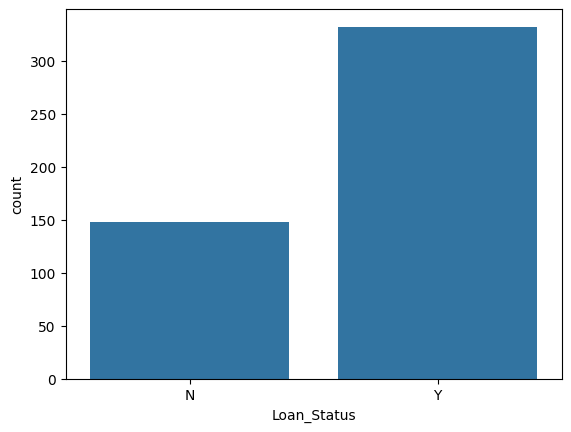

In [47]:
# Check the class distribution
print(loan_dataset['Loan_Status'].value_counts())

# Plot the class distribution
sns.countplot(x='Loan_Status', data=loan_dataset)

In [48]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-48-9c9fabfe2615>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
<ipython-input-48-9c9fabfe2615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [49]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-49-cc448655d7b3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
<ipython-input-49-cc448655d7b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [50]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [51]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [52]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [53]:
# X['Loan_ID'] = X['Loan_ID'].str.replace('LP', '11') dont change it


In [54]:
# X['Dependents'] = X['Dependents'].str.replace('3+', '3')


In [55]:
print(X['Dependents'].value_counts())

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64


In [56]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [57]:
# from sklearn.preprocessing import LabelEncoder

# # Specify the columns you want to encode
# columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed','Property_Area']  # Add or remove columns as needed

# # Initialize LabelEncoder
# label_enc = LabelEncoder()

# # Apply LabelEncoder only to the specified columns
# for col in columns_to_encode:
#     X[col] = label_enc.fit_transform(X[col])

# # Check the transformed dataset
# print(X.head())

In [58]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# label_enc = LabelEncoder()

# # Assuming Y is the 'Loan_Status' column
# Y = loan_dataset['Loan_Status']

# # Apply LabelEncoder to 'Loan_Status' column
# Y_encoded = label_enc.fit_transform(Y)

# # Check the transformed data
# print(Y_encoded)

In [59]:
# Y = Y_encoded

In [60]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [61]:
X.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [62]:
# X = X.dropna(axis = 1) dont drop

In [63]:
# X.fillna(0, inplace=True)

In [64]:
# X.isnull().sum()

In [65]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Loan_Status
1    332
0    148
Name: count, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

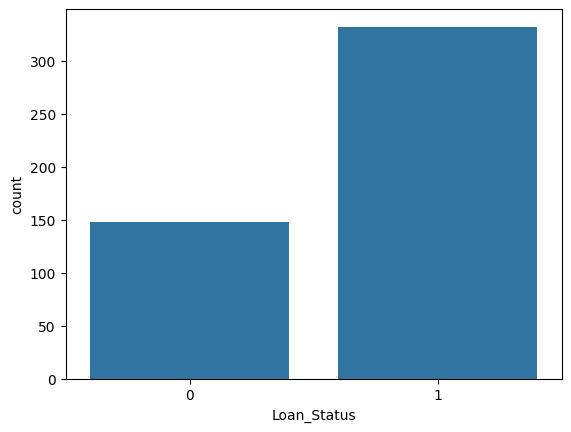

In [66]:
# Check the class distribution
print(loan_dataset['Loan_Status'].value_counts())

# Plot the class distribution
sns.countplot(x='Loan_Status', data=loan_dataset)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state = 10)

In [70]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='auto', random_state=42)

# X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# # Step 3: Check the distribution of classes after SMOTE
# unique_classes, counts = np.unique(Y_train_resampled, return_counts=True)
# distribution_after_smote = pd.Series(counts, index=unique_classes)
# print(f"Training set target distribution after SMOTE:\n{distribution_after_smote}")

In [71]:
print(X_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
143       1        1          0          1              0             2698   
307       0        0          0          1              0             2400   
136       0        1          0          1              0             4583   
440       1        0          0          1              0             3660   
227       1        1          2          1              0             6250   
..      ...      ...        ...        ...            ...              ...   
254       1        0          0          1              1            16250   
582       0        1          0          1              0             3166   
598       1        1          0          1              1             9963   
569       1        1          0          1              0             3166   
357       1        1          1          1              0             3875   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [72]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [73]:
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_train =X_train_std

In [74]:
print(X_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
143       1        1          0          1              0             2698   
307       0        0          0          1              0             2400   
136       0        1          0          1              0             4583   
440       1        0          0          1              0             3660   
227       1        1          2          1              0             6250   
..      ...      ...        ...        ...            ...              ...   
254       1        0          0          1              1            16250   
582       0        1          0          1              0             3166   
598       1        1          0          1              1             9963   
569       1        1          0          1              0             3166   
357       1        1          1          1              0             3875   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [75]:
from sklearn import svm

In [84]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [85]:
X_pred = model.predict(X_train)
tr_data_acc = accuracy_score(X_pred, Y_train)
print(tr_data_acc)

0.8125


In [86]:
X_test_pred = model.predict(X_test)
ts_data_acc = accuracy_score(X_test_pred, Y_test)
print(ts_data_acc)

0.7916666666666666


In [87]:
print(X_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
143       1        1          0          1              0             2698   
307       0        0          0          1              0             2400   
136       0        1          0          1              0             4583   
440       1        0          0          1              0             3660   
227       1        1          2          1              0             6250   
..      ...      ...        ...        ...            ...              ...   
254       1        0          0          1              1            16250   
582       0        1          0          1              0             3166   
598       1        1          0          1              1             9963   
569       1        1          0          1              0             3166   
357       1        1          1          1              0             3875   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [80]:
# loan_dataset.to_csv('modified_dataset44.csv', index=False)


In [81]:
# input_data = (1,0,0,0,0,5849,0.0,1,2)

# input_data_np = np.asarray(input_data, dtype=object)  # Ensure that the  ID is treated as an object
# input_data_reshaped = input_data_np.reshape(1, -1)
# in_np = np.asarray(input_data)
# input_data_reshaped = in_np.reshape(1, -1)

# std_data = sc.transform(input_data_reshaped)
# print(std_data)
# prediction = model.predict(std_data)
# print(prediction)

# if prediction[0] == 1:
#     print('Y')
# else:
#     print('N')




              precision    recall  f1-score   support

           0       0.33      1.00      0.50        10
           1       1.00      0.77      0.87        86

    accuracy                           0.79        96
   macro avg       0.67      0.88      0.68        96
weighted avg       0.93      0.79      0.83        96



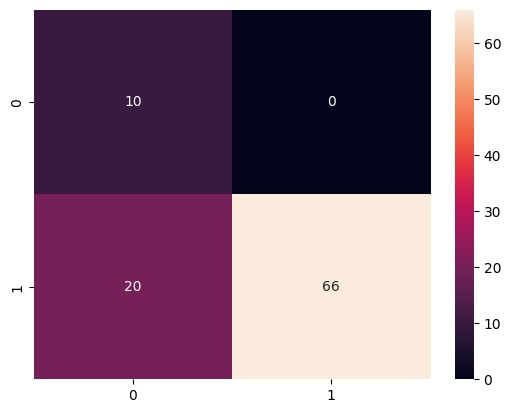

In [88]:
from sklearn.metrics import confusion_matrix ,classification_report
corr  = confusion_matrix(X_test_pred,Y_test)
sns.heatmap(corr,annot =True)
print(classification_report(X_test_pred,Y_test))

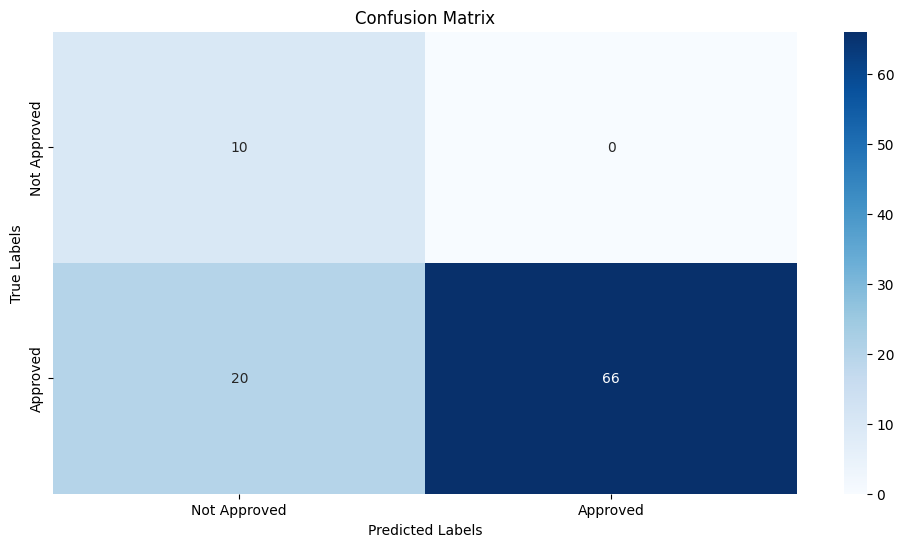

In [89]:


# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Approved', 'Approved'],
            yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [93]:
!pip install scikit-learn

In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [97]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [98]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,Y, cv=5)

    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


In [99]:
compare_models_cross_validation()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.80208333 0.78125    0.77083333 0.86458333 0.80208333]
Accuracy % of the  LogisticRegression(max_iter=1000) 80.42
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [0.79166667 0.78125    0.76041667 0.82291667 0.71875   ]
Accuracy % of the  SVC(kernel='linear') 77.5
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.67708333 0.67708333 0.66666667 0.58333333 0.64583333]
Accuracy % of the  KNeighborsClassifier() 65.0
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.80208333 0.77083333 0.80208333 0.82291667 0.80208333]
Accuracy % of the  RandomForestClassifier() 80.0
----------------------------------------------
